In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as linalg

## Matrix operations  in NumPy

If we define a vector and matrix, we can multiply them explicitly, but it is better to use NumPy routines.

In [2]:
n = 30000
A = np.zeros((n, n))
x = np.zeros(n)

In [3]:
def explicit(A=None, x=None):
    n = A.shape[0]
    b = np.zeros(n)
    for i in np.arange(n):
        b[i] = (A[i, :] * x).sum()
    return(b)

In [4]:
%timeit b = explicit(A=A, x=x)

525 ms ± 5.15 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [5]:
%timeit b = A.dot(x)

26.1 ms ± 120 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


One can also make outer products and other operations with NumPy arrays.

In [6]:
x = np.zeros(100)
q = np.zeros(50)
y = np.outer(x, q)
print(y.shape)

(100, 50)


And the numpy.linalg module contains a plethora of other operations.

In [7]:
y = np.zeros((100, 100))
print(linalg.det(y))

0.0


In [9]:
x = np.zeros((6, 10, 5))
y = np.zeros((10))
z = np.zeros((5))
w = np.einsum('ijk,j,k->i', x, y, z)
print(w.shape)

(6,)


## Solving a linear system

In [35]:
n = 20
A = np.random.random((20, 20))
A[10, :] = A[9, :] + A[11, :] + 1.e-15
x_actual = np.random.random(20)

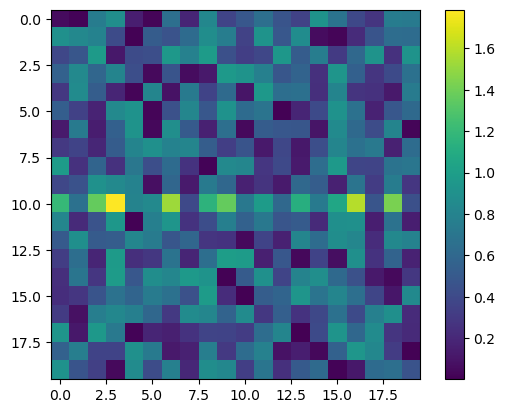

In [36]:
plt.imshow(A)
plt.colorbar()

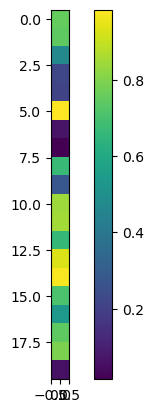

In [37]:
plt.imshow(x_actual.reshape((20, 1)))
plt.colorbar()

In [38]:
b = A.dot(x_actual)
print(b)

[ 5.39284772  6.41077497  6.42870664  6.07290045  5.60572562  5.01194774
  4.65490305  5.1769201   5.81374128  5.04285804 11.40811513  6.36525709
  6.3762924   4.98091087  6.56612776  6.11353711  6.28384322  5.5409821
  5.94782676  5.86327139]


In [39]:
x = linalg.solve(A, b).reshape(n)

In [40]:
print(x)

[ 1.26197221  6.66623129 -0.12639186 -4.5492982  -8.87925387 -3.02265154
  0.58358234  0.69760214  9.69791266  5.16841809  1.37212064 -9.0470231
 -9.760774    5.44701286  4.79167306 12.47854043 -2.34210538  5.44013774
 -0.71874075 -6.53473068]


In [41]:
print(x - x_actual)

[  0.50719937   5.9215008   -0.59595573  -4.77090535  -9.09120705
  -4.00654039   0.51589198   0.68264093   9.02840025   4.89003886
   0.53001443  -9.89699071 -10.42245303   4.5157186    3.81568056
  11.76796181  -2.87498524   4.69567597  -1.51333162  -6.59162965]


We can also solve this by explicitly taking the inverse. If we are going to need to solve the equation more than $N$ times, this becomes worthwhile, because we can just calculate and save the inverse, and then apply it, rather than performing the backsubstitution explicitly every time.

In [42]:
Ainv = linalg.inv(A)
x = Ainv.dot(b)
print(x - x_actual)

[ 12.24522716  -2.74473049  20.28043613 -12.22160716 -20.21195318
  -8.98388886  -2.06769036  -4.2649612   35.33048759  -2.27837923
  -8.84210621 -24.84996761  11.33832097   7.06870574  12.0240075
  19.28942138  -7.53287987  -2.74446177  -1.79459087  -6.05689897]


## NumPy Application of SVD

Let us explore how a matrix works as a linear mapping, and how SVD tells us about that linear mapping.

In [43]:
A = np.zeros((2, 2))
A[0, 0] = 1
A[0, 1] = 0.5
A[1, 0] = 0.5  
A[1, 1] = 1
print(A)

[[1.  0.5]
 [0.5 1. ]]


Let's take two basis vectors for the space of $\vec{x}$:

In [44]:
x0 = np.array([1., 0])
x1 = np.array([0., 1])
origin = np.array([0., 0.])

Text(0, 0.5, '$x_1$')

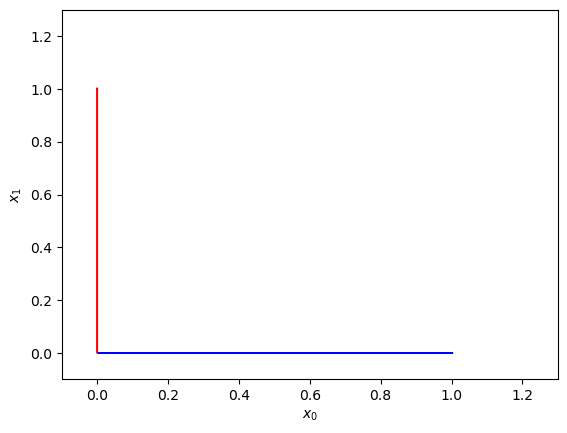

In [45]:
plt.arrow(origin[0], origin[1], x0[0], x0[1], color='blue')
plt.arrow(origin[0], origin[1], x1[0], x1[1], color='red')
plt.xlim((-0.1, 1.3))
plt.ylim((-0.1, 1.3))
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')

In [47]:
b0 = A.dot(x0)
b1 = A.dot(x1)

Text(0, 0.5, '$b_1$')

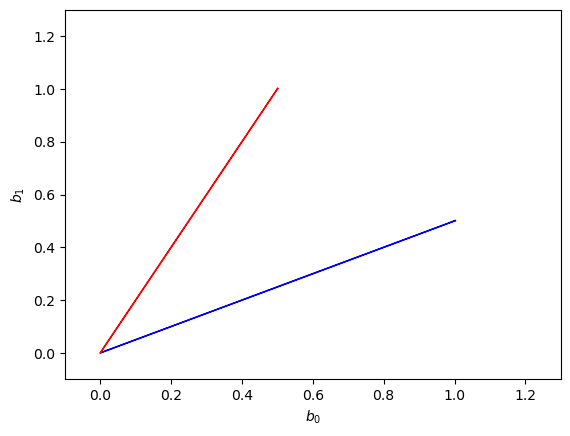

In [48]:
plt.arrow(origin[0], origin[1], b0[0], b0[1], color='blue')
plt.arrow(origin[0], origin[1], b1[0], b1[1], color='red')
plt.xlim((-0.1, 1.3))
plt.ylim((-0.1, 1.3))
plt.xlabel('$b_0$')
plt.ylabel('$b_1$')

In [49]:
(U, w, VT) = linalg.svd(A)

In [51]:
print(w)

[1.5 0.5]


In [52]:
print(U)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [53]:
print(VT)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]


In [55]:
Ainv = VT.transpose().dot(np.diag(1. / w)).dot(U.transpose())
print(Ainv.dot(b0))
print(Ainv.dot(b1))

[1.00000000e+00 2.22044605e-16]
[0. 1.]


In [56]:
x = np.random.normal(size=(2, 1000))
b = A.dot(x)

Text(0, 0.5, '$x_1$')

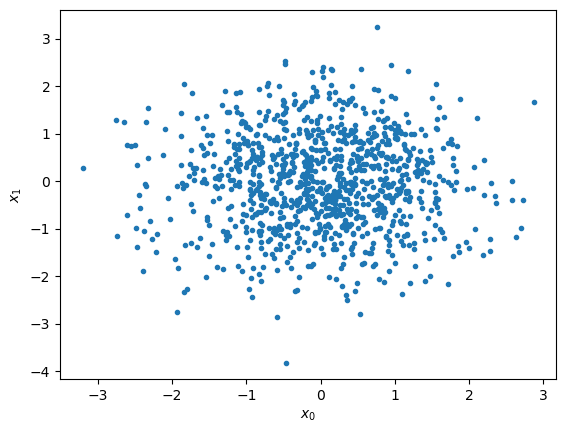

In [57]:
plt.plot(x[0, :], x[1, :], '.')
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")

Text(0, 0.5, '$b_1$')

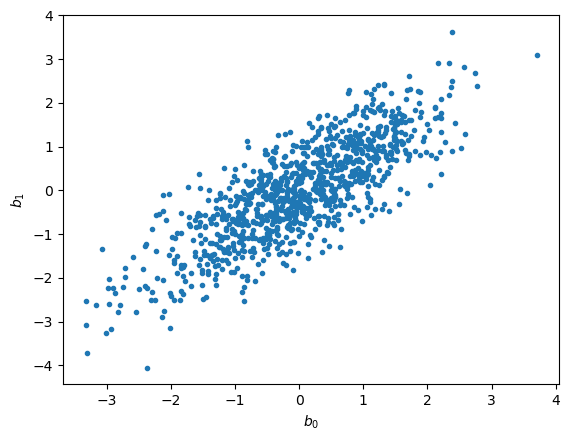

In [58]:
plt.plot(b[0, :], b[1, :], '.')
plt.xlabel("$b_0$")
plt.ylabel("$b_1$")

## A simple singular matrix

In [59]:
A = np.zeros((2, 2))
A[0, 0] = 1
A[0, 1] = -1
A[1, 0] = -1
A[1, 1] = 1
print(A)

[[ 1. -1.]
 [-1.  1.]]


We can see clearly the range of $A$ by throwing a bunch of random points at it.

In [63]:
x = np.random.normal(size=(2, 1000))
b = A.dot(x)

Text(0, 0.5, '$x_1$')

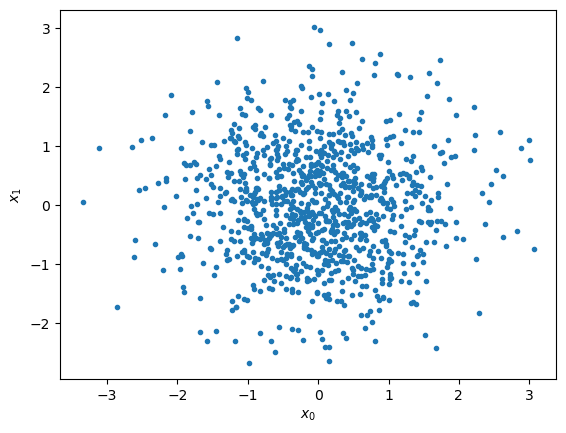

In [64]:
plt.plot(x[0, :] , x[1, :], '.')
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")

Text(0, 0.5, '$b_1$')

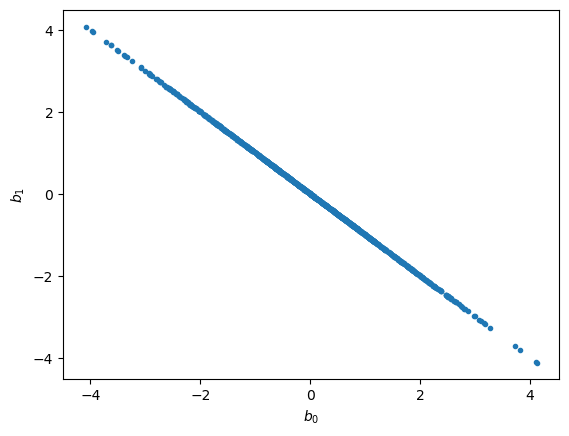

In [65]:
plt.plot(b[0, :], b[1, :], '.')
plt.xlabel("$b_0$")
plt.ylabel("$b_1$")

It is sufficient, in fact, to look just at what happens to the basis vectors (all other results are just a linear combination of those).

In [66]:
x0 = np.array([1., 0])
x1 = np.array([0., 1])
origin = np.array([0., 0.])

In [67]:
b0 = A.dot(x0)
b1 = A.dot(x1)

Text(0, 0.5, '$b_1$')

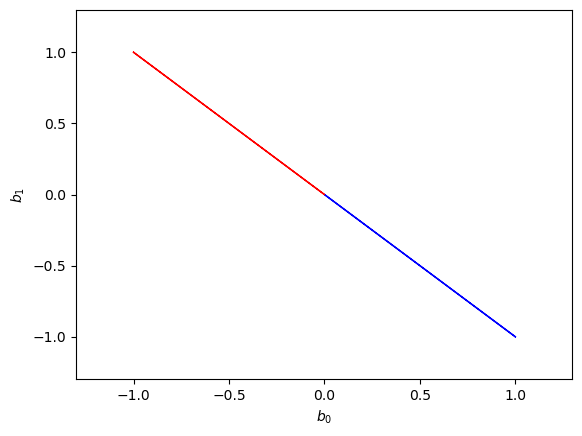

In [68]:
plt.arrow(origin[0], origin[1], b0[0], b0[1], color='blue')
plt.arrow(origin[0], origin[1], b1[0], b1[1], color='red')
plt.xlim((-1.3, 1.3))
plt.ylim((-1.3, 1.3))
plt.xlabel('$b_0$')
plt.ylabel('$b_1$')

SVD gives us a diagnosis; for much higher dimensional problems this is very useful.

In [69]:
(U, w, VT) = np.linalg.svd(A)

Note that this results in a zero component of $w$:

In [71]:
print(w)

[2.00000000e+00 3.35470445e-17]


The columns of ${\bf U}$ corresponding to non-zero $w_j$ give the range of ${\bf A}$:

In [73]:
print(U)
print(U[0, :])

[[-0.70710678  0.70710678]
 [ 0.70710678  0.70710678]]
[-0.70710678  0.70710678]


And the columns of ${\bf V}$ corresponding to zero $w_j$ give the null space: 

In [74]:
print(VT.transpose()[:, 1])

[-0.70710678 -0.70710678]


We can see how SVD works on some simple examples. If $\vec{b} = (-0.5, 0.6)$, we should expect to get an $\vec{x}$ that gets us as close as we can get to this within the range of ${\bf A}$. It will not get us exactly there however.

In [ ]:
winv = np.zeros(len(w))
indx = np.where(w > w.max() * 1.e-15)[0]
winv[indx] = 1. / w[indx]
print(winv)

In [ ]:
Ainv = VT.transpose().dot(np.diag(winv)).dot(U.transpose()) 

In [ ]:
b = np.array([-0.5, 0.6])
x = Ainv.dot(b)

In [ ]:
print(x)

${\bf A}\cdot\vec{x}$ yields some approximation of $\vec{b}$, that lies in the range:

In [ ]:
bapprox = print(A.dot(x))

If $\vec{b}$ is in the range, e.g. is $(1, -1)$, it can be recovered exactly: 

In [ ]:
b = np.array([1., -1])
x = Ainv.dot(b)

In [ ]:
print(x)

In [ ]:
bapprox = print(A.dot(x))

Note that the null space allows me to add any vector with $x_0 = x_1$ to the above solution. The given $\vec{x}$ is the choice which minimizes its norm.

In [ ]:
print(VT)

## Fitting data

We can use SVD to solve linear regressions.

Text(0, 0.5, 'b')

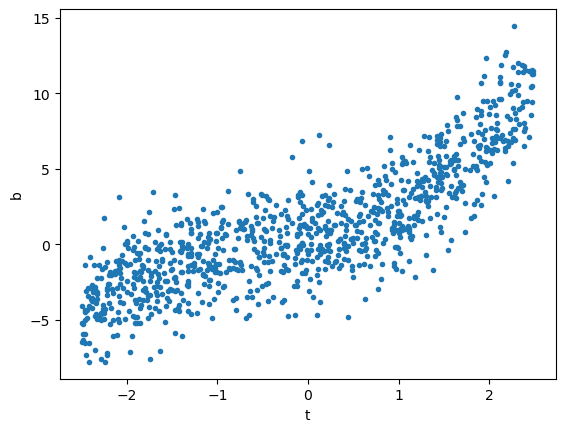

In [14]:
t = np.random.random(size=1000) * 5. - 2.5
t[100] = t[99]
b = 0.5 + 1.2 * t + 0.43 * t**2 + 0.314 * t**3 + 2. * np.random.normal(size=len(t))
plt.plot(t, b, '.')
plt.xlabel('t')
plt.ylabel('b')

In [18]:
A = np.zeros((len(t), 4))
A[:, 0] = 1.
A[:, 1] = t 
A[:, 2] = t**2
A[:, 3] = t**3
print(A.shape)
print(A)

(1000, 4)
[[  1.          -2.28644062   5.22781072 -11.9530788 ]
 [  1.          -2.35587705   5.55015665 -13.07548665]
 [  1.          -1.32696047   1.76082408  -2.33654395]
 ...
 [  1.          -1.01227924   1.02470927  -1.03729192]
 [  1.          -1.09671135   1.20277579  -1.31909786]
 [  1.           1.56458027   2.44791141   3.82995389]]


In [19]:
(u, w, vt) = np.linalg.svd(A, full_matrices=False)

In [20]:
print(u.shape)
print(w.shape)
print(vt.shape)
print(w)

(1000, 4)
(4,)
(4, 4)
[188.26691371  89.25936898  20.2649033   17.83323944]


In [21]:
ainv = vt.transpose().dot(np.diag(1. / w)).dot(u.transpose())

In [22]:
x = ainv.dot(b)

In [23]:
print(x)

[0.3751604  1.25255656 0.45166794 0.2986836 ]


In [24]:
bm = A.dot(x)

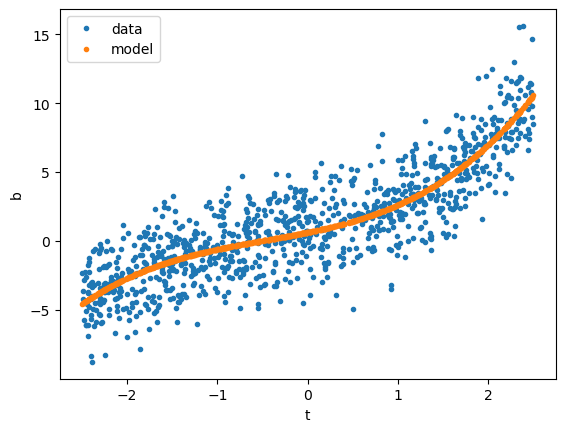

In [12]:
plt.plot(t, b, '.', label='data')
plt.plot(t, bm, '.', label='model')
plt.xlabel('t')
plt.ylabel('b')
plt.legend()

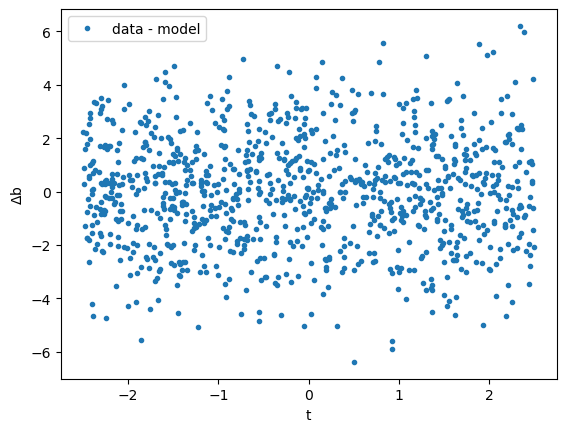

In [13]:
plt.plot(t, b - bm, '.', label='data - model')
plt.xlabel('t')
plt.ylabel('$\Delta$b')
plt.legend()

## Scaling the dependent variable to better condition matrices

In the example above, $x$ took on values of order unity. But you have to be careful in problems like this to avoid roundoff issues that can occur if you set up the problem incorrectly. 

To demonstrate this issue, we are going to fit at slightly higher order, because the problem arises more quickly in that case. 

But the key thing that happens here is that we are using a dependent variable that gets to high values, and which we take a large power of. This will lead to a design matrix $A$ whose components have a wide dynamic range, which will lead it to be ill-conditioned.


Text(0, 0.5, 'b')

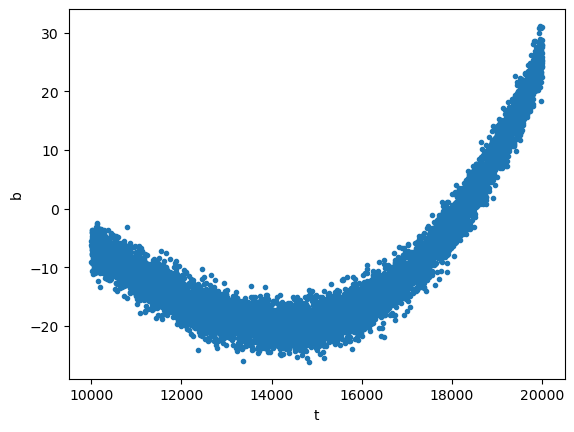

In [26]:
t = np.random.random(size=10000) * 10000. + 10000.
b = 40. + 0.1e-3 * t - 0.8e-6 * t**2 + 0.03e-9 * t**3 + 2.e-16 * t**4 + 1.e-20 * t**5 + 2. * np.random.normal(size=len(t))
plt.plot(t, b, '.')
plt.xlabel('t')
plt.ylabel('b')

As noted above, we are fitting a higher order polynomial in this case; a fifth order one.

In [27]:
A = np.zeros((len(t), 6))
A[:, 0] = 1.
A[:, 1] = t 
A[:, 2] = t**2
A[:, 3] = t**3
A[:, 4] = t**4
A[:, 5] = t**5
print(A)

[[1.00000000e+00 1.69827645e+04 2.88414291e+08 4.89807199e+12
  8.31828033e+16 1.41267396e+21]
 [1.00000000e+00 1.79214891e+04 3.21179771e+08 5.75601977e+12
  1.03156445e+17 1.84871711e+21]
 [1.00000000e+00 1.94933231e+04 3.79989647e+08 7.40726099e+12
  1.44392132e+17 2.81468249e+21]
 ...
 [1.00000000e+00 1.47197029e+04 2.16669652e+08 3.18931290e+12
  4.69457382e+16 6.91027318e+20]
 [1.00000000e+00 1.77298476e+04 3.14347497e+08 5.57333323e+12
  9.88143490e+16 1.75196335e+21]
 [1.00000000e+00 1.75692313e+04 3.08677889e+08 5.42323323e+12
  9.52820390e+16 1.67403218e+21]]


In [28]:
(u, w, vt) = np.linalg.svd(A, full_matrices=False)

Look for example at the eigenvalues! They span almost 25 orders of magnitude! The condition number is the ratio of the highest to lowest eigenvalues, so it is of order $10^{25}$, which is "not great."

In [29]:
print(w)

[1.37451729e+23 7.36115182e+17 8.48783109e+12 1.09743862e+08
 2.96817891e+05 1.77793768e-02]


In [30]:
ainv = vt.transpose().dot(np.diag(1. / w)).dot(u.transpose())

In [31]:
x = ainv.dot(b)

The coefficients do not look correct at all!

In [32]:
print(x)

[ 1.22205466e+02 -1.47530738e-04 -2.62718907e-06  2.15119805e-10
 -7.06468758e-15  1.00602561e-19]


In [33]:
bm = A.dot(x) 

And indeed they do not predict the data well.

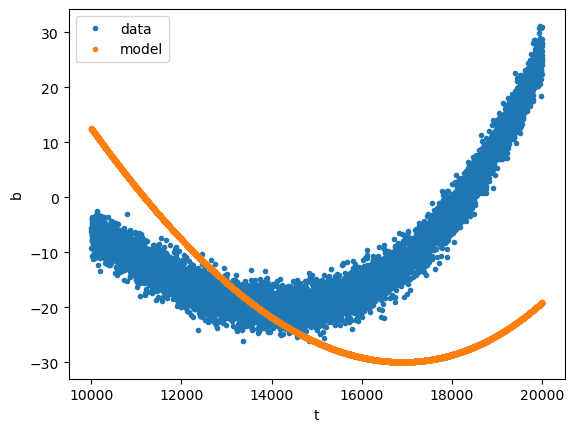

In [34]:
plt.plot(t, b, '.', label='data')
plt.plot(t, bm, '.', label='model')
plt.xlabel('t')
plt.ylabel('b')
plt.legend()

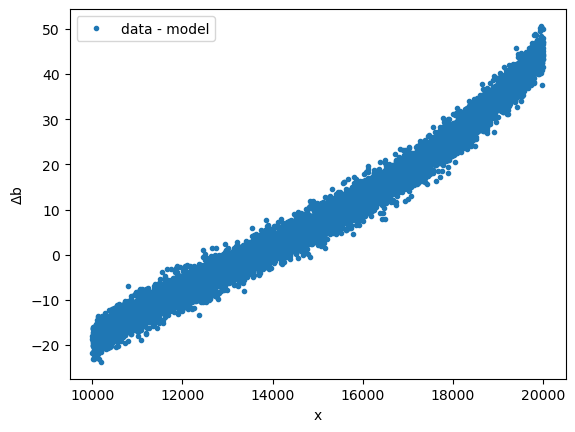

In [35]:
plt.plot(t, b - bm, '.', label='data - model')
plt.xlabel('x')
plt.ylabel('$\Delta$b')
plt.legend()

What has happened? The design matrix $A$ has a large condition number, which is the ratio of the maximum to minimum eigenvalue. This is basically saying that the matrix is close to degenerate. When the condition number exceeds the dynamic range of your floating point numbers, there is no guarantee that the SVD solution will be stable. Basically, round-off error can then cause the procedure to fail.

But we can avoid this situation and find the solution to our problem. We can rescale:

$$t' = \frac{t - {\bar t}}{\sigma_t}$$

where in this case we have chosen to shift to a variable taken around the mean ${\bar t}$ and to normalize by the standard deviation $\sigma_t$. There is not anything particularly special about that exact choice. Anything that gets $t'$ to be order unity is fine.

You can see that now when you expand this as a polynomial, all the powers of $t'$ are of the same order. This leads to a much better conditioned matrix. Then instead of solving for some polynomial $f(t)$ you solve for the polynomial solution $f'(t')$ in $t'$. This solution gives precisely the same values same function you would have gotten if you solved for $t$, in the sense that $f'(t') = f(t)$. 

In [36]:
tp = (t - t.mean()) / t.std()

In [37]:
A = np.zeros((len(tp), 6))
A[:, 0] = 1.
A[:, 1] = tp 
A[:, 2] = tp**2
A[:, 3] = tp**3
A[:, 4] = tp**4
A[:, 5] = tp**5
print(A)

[[ 1.00000000e+00  6.74355662e-01  4.54755559e-01  3.06666986e-01
   2.06802619e-01  1.39458517e-01]
 [ 1.00000000e+00  9.99081311e-01  9.98163465e-01  9.97246463e-01
   9.96330303e-01  9.95414985e-01]
 [ 1.00000000e+00  1.54281358e+00  2.38027373e+00  3.67231863e+00
   5.66570304e+00  8.74112358e+00]
 ...
 [ 1.00000000e+00 -1.08487569e-01  1.17695526e-02 -1.27685015e-03
   1.38522368e-04 -1.50279550e-05]
 [ 1.00000000e+00  9.32788281e-01  8.70093976e-01  8.11613464e-01
   7.57063528e-01  7.06179986e-01]
 [ 1.00000000e+00  8.77227529e-01  7.69528138e-01  6.75051268e-01
   5.92173556e-01  5.19470945e-01]]


In [38]:
(u, w, vt) = np.linalg.svd(A, full_matrices=False)

Now look at the eigenvalues. This is a much better conditioned matrix.

In [39]:
print(w)

[515.42034616 332.47639909  81.05309031  66.18350038  22.80810715
  13.78215172]


In [40]:
ainv = vt.transpose().dot(np.diag(1. / w)).dot(u.transpose())

In [41]:
x = ainv.dot(b)

The coefficients are not the original coefficients. They are coefficients in the polynomial in $t'$. You can figure out the relationship between the two sets of coefficients, because they have a one-to-one relationship---they are both the same polynomial at the same order in $x$. But you rarely would really need to do that. If you need $f(t)$, you just determine $t'$ and plug it into $f'(t')$.

In [42]:
print(x)

[-19.4472694    4.73351466   9.77696828   1.53896291   0.03645561
   0.02237293]


In [43]:
bm = A.dot(x) 

And now they predict the data well!

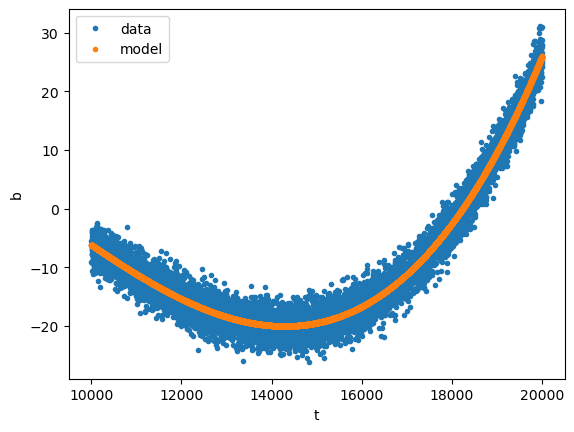

In [44]:
plt.plot(t, b, '.', label='data')
plt.plot(t, bm, '.', label='model')
plt.xlabel('t')
plt.ylabel('b')
plt.legend()

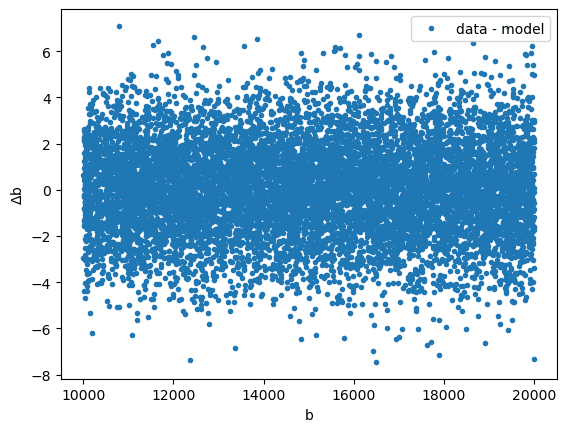

In [47]:
plt.plot(t, b - bm, '.', label='data - model')
plt.xlabel('b')
plt.ylabel('$\Delta$b')
plt.legend()

Another feature of the better-conditioned case is that the coefficients are less degenerate with each other.

It is easy to see this for the case of fitting a line in $x$. If all the data is at very high $x$, then the slope and the offset are very degenerate. But once you rescale to $x'$, they are much more independently determined. 

This makes it clear that this effect can be important even if you are dealing with a non-linear model that cannot be addressed with SVD, or a linear model that for some reason you using a more generic minimizer on. In these cases, an inappropriate setup of the model can lead to unnecessarily degenerate parameters, which will cause any minimizer difficult. 

We can look at the covariance matrix of the parameters using the formula:

$$C = (A^T\cdot A)^{-1}$$

to see this effect.

For the demonstration, we won't look at a case that is literally degenerate, just a less-well-conditioned case. So we will fit a 3rd-order polynomial, and will use a dependent variable whose mean is not near zero for the data, but isn't so high that it causes numerical issues.

Text(0, 0.5, 'y')

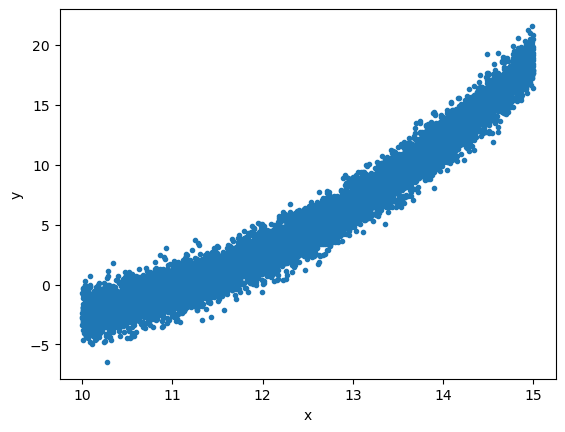

In [48]:
x = np.random.random(size=10000) * 5. + 10.
y = 0.5 + 0.2 * x - 0.283 * x**2 + 0.0234 * x**3 + 1. * np.random.normal(size=len(x))
plt.plot(x, y, '.')
plt.xlabel('x')
plt.ylabel('y')

In [49]:
A = np.zeros((len(x), 4))
A[:, 0] = 1.
A[:, 1] = x 
A[:, 2] = x**2
A[:, 3] = x**3

In [50]:
(u, w, vt) = np.linalg.svd(A, full_matrices=False)

In [51]:
print(w)

[2.15794762e+05 1.67099910e+03 1.48667125e+01 1.19888807e-01]


In [52]:
ainv = vt.transpose().dot(np.diag(1. / w)).dot(u.transpose())

In [53]:
c = ainv.dot(y)

In [54]:
print(c)

[ 9.06241737 -1.99758971 -0.0984017   0.01830703]


In [55]:
ym = A.dot(c) 

The fit works just fine.

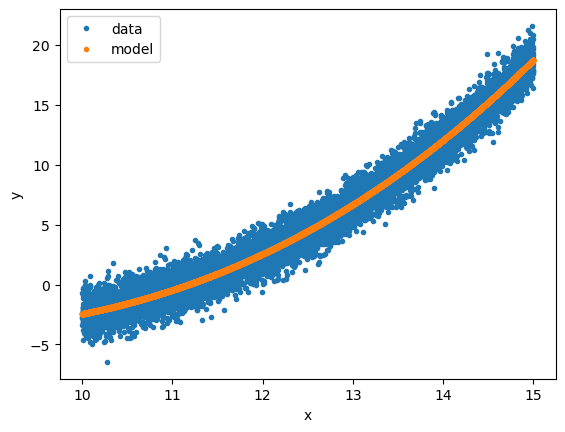

In [56]:
plt.plot(x, y, '.', label='data')
plt.plot(x, ym, '.', label='model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

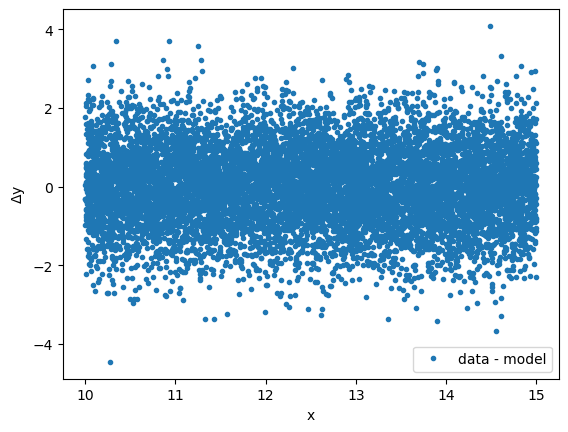

In [57]:
plt.plot(x, y - ym, '.', label='data - model')
plt.xlabel('x')
plt.ylabel('$\Delta$y')
plt.legend()

But we can look at the covariance matrix and see that it has large off-diagonal terms.

The easiest way to see this is to actually look at the correlation matrix:

$$\frac{C_{ij}}{\sqrt{C_{ii} C_{jj}}}$$

which is limited to the range $-1$ to $1$, betweeen perfect anticorrelation and perfect correlation.

The parameters of this fit are extremely highly correlated! Or anticorrelated!

The SVD solution deals with this OK, but it is worth remembering that most general optimizers will have a much harder time with this situation. So when you are doing a general non-linear problem, it is even more important to avoid this type of situation.

In [58]:
covar = np.linalg.inv(A.T.dot(A))
corr = np.zeros((4, 4))
for i in np.arange(4):
    for j in np.arange(4):
        corr[i, j] = covar[i,j] / np.sqrt(covar[i, i] * covar[j, j])
        
print(corr)

[[ 1.         -0.99939806  0.99762772 -0.99476998]
 [-0.99939806  1.         -0.99941172  0.99769467]
 [ 0.99762772 -0.99941172  1.         -0.99943217]
 [-0.99476998  0.99769467 -0.99943217  1.        ]]


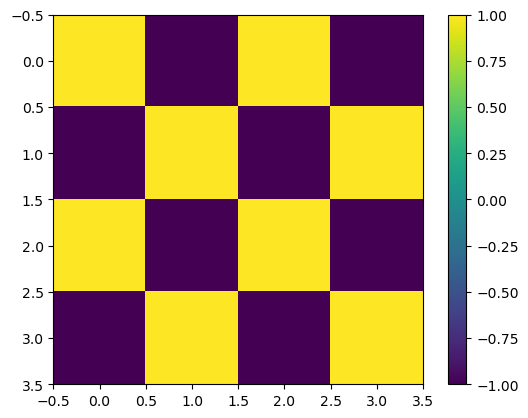

In [59]:
plt.imshow(corr, vmin=-1, vmax=1)
plt.colorbar()

This issue is resolved by transforming to $x'$, as I show below (though note that there are still significant covariances even in this case).

In [60]:
xp = (x - x.mean()) / x.std()

In [61]:
Ap = np.zeros((len(xp), 4))
Ap[:, 0] = 1.
Ap[:, 1] = xp 
Ap[:, 2] = xp**2
Ap[:, 3] = xp**3

In [62]:
covarp = np.linalg.inv(Ap.T.dot(Ap))
corrp = np.zeros((4, 4))
for i in np.arange(4):
    for j in np.arange(4):
        corrp[i, j] = covarp[i,j] / np.sqrt(covarp[i, i] * covarp[j, j])
print(corrp)

[[ 1.         -0.0119861  -0.74697951  0.00432688]
 [-0.0119861   1.         -0.00923324 -0.91764879]
 [-0.74697951 -0.00923324  1.          0.02174843]
 [ 0.00432688 -0.91764879  0.02174843  1.        ]]


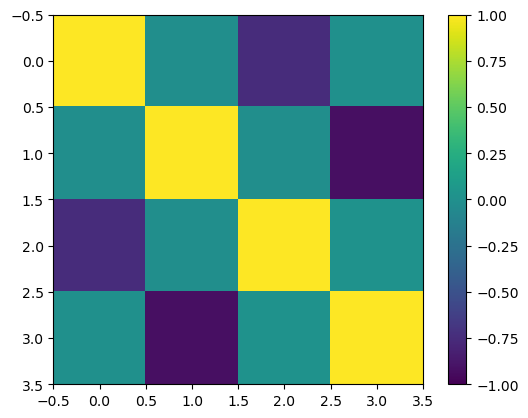

In [63]:
plt.imshow(corrp, vmin=-1, vmax=1)
plt.colorbar()